In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from datetime import datetime
from statsmodels.api import OLS, RLM
from statsmodels.formula.api import ols, rlm, wls
import statsmodels.api as sm

In [2]:
import scipy.integrate as si

In [3]:
from pandas import Series, DataFrame

In [4]:
date = datetime.now()                                            # fecha para nombrar archivos
date = str(date).replace(':', '').replace(' ','_').split('.')[0] # cambio de formato

In [5]:
#sns.set_style('whitegrid')
sns.set(style="ticks", palette="Set2")
sns.despine()

In [6]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 150)

In [7]:
%matplotlib inline

In [8]:
%load_ext rpy2.ipython

In [9]:
%precision 3

'%.3f'

In [10]:
info_tramos = {1 : 'Negativas y cero',
               2 : 'De 0,01 a 3.000,00',
               3 : 'De 3.000,01 a 6.000,00',
               4 : 'De 6.000,01 a 12.000,00',
               5 : 'De 12.000,01 a 18.000,00',
               6 : 'De 18.000,01 a 30.000,00',
               7 : 'De 30.000,01 a 60.000,00',
               8 : 'De 60.000,01 a 120.000,00',
               9 : 'De 120.000,01 a 240.000,00',
               10 : 'De 240.000,01 en adelante'}

info_ccaa = pd.read_csv('data/nombres_ccaa.csv').to_dict(orient='record')[0]

In [11]:
%%!

open doc/doc_2014_18.pdf
open .

[]

![metodología muestreo 1][img1]

![metodología muestreo 1][img2]

![metodología muestreo 1][img3]

[img1]: doc/1.jpg
[img2]: doc/2.jpg
[img3]: doc/3.jpg

VARIANZA DATOS DISCRETOS:

$\sigma_X^2 = ( \sum_{i=1}^n p_i\cdot(x_i - \mu)^2)$
donde

$\mu = ( \sum_{i=1}^n p_i\cdot x_i )$

# DATOS:

In [11]:
f = 'data/2011/2011principales.csv'
df = pd.read_csv(f)
df.head()

,ndecla,nhogar,nppal,ncyge,expediente,municipio,dh,ccaa,tramo,marcafuente,factor,factoroptimizado,fechappal,sexoppal,falleceppal,sexocyge,fallececyge,tipotributacion,categoriadecla,minimosdecla,incluirdecla,rentamuestreo,ingresostrabajo,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,...,c891,c892,c893,c894,c895,c896,c897,c898,c899,c900,c901,c902,c903,c904,c905,c906,c907,c908,c909,c910,c911,c912,c913,c914,c916,c917,c918,c919,c920,c921,c922,c923,c924,c925,c926,c927,c928,c929,c930,c931,c932,c933,c934,c935,c936,c937,c938,c1094,c1098,c1099
0,5743234,557846,1002095917,28005171063,201110066341636K,28006,28,12,5,0,22.409611,22.156199,19600124,1,0,2,0,I,4,2,1,1445602,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,333188,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2156,1313625,0
1,5743235,470524,1002123512,28039028136,201110072331775J,11004,11,1,9,0,1.004492,1.054458,19520412,1,0,2,0,I,4,1,1,13669202,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,952777,0,197691,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4233668,0,838116
2,5743236,557847,1002136926,1800828795,201110031720523R,3900,3,17,5,1,53.088840,53.472625,19540408,1,0,2,0,I,4,1,1,1299700,981000,981000,0,0,0,0,0,0,0,981000,0,0,0,0,0,981000,385950,0,0,0,595050,129062,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,88951,376131,0
3,5743237,800417,1002138304,0,201110017981270P,9284,9,8,4,0,23.640444,23.522815,19650716,2,0,NaN,0,I,1,2,1,777362,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29010,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17426,122898,0
4,5743238,557849,1002201551,1002201584,201110047050842D,28092,28,12,6,1,50.378803,50.503532,19330422,1,0,2,0,C,3,4,1,1957596,1194662,1194662,0,0,0,0,0,0,0,1194662,0,0,0,0,0,1194662,265200,0,0,0,929462,582742,0,0,0,0,6264,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81566,30355,0


In [12]:
data_2010 = 'data/2010/dmuestra.csv'  # muestra de 2010
data_2011 = 'data/2011/dmuestra.csv'  # muestra de 2011

In [13]:
INFO = pd.read_csv('data/variables_descripcion.csv', encoding='utf-8', index_col=0) # informacion de las variables

In [14]:
INFO

,descripcion
variables,
c455,BASE IMPONIBLE GENERAL (450 ­ 451 + 452 ­ 453 ­ 454)
c620,BASE LIQUIDABLE GENERAL SOMETIDA A GRAVAMEN. (618 ­ 619)
c689,APLICACIÓN DE LAS ESCALAS DEL IMPUESTO AL IMPORTE DE LA CASILLA 620 (Parte Estatal).
c690,APLICACIÓN DE LAS ESCALAS DEL IMPUESTO AL IMPORTE DE LA CASILLA 620 (Parte Autonómica)
c698,CUOTAS INTEGRAS (693 + 696) (Parte Estatal)
c699,CUOTAS INTEGRAS (694 + 697) (Parte Autonómica)
c730,CUOTAS LIQUIDAS INCREMENTADAS ( 720 + 722 + 723 + 724 + 725 ) (Parte Estatal).
c731,CUOTAS LIQUIDAS INCREMENTADAS ( 721 + 726 + 727 + 728 + 729 ) (Parte Autonómica).
categoriadecla,Variable creada para recoger las posibles combinaciones del tipo de tributación y el estado civil.


In [16]:
# 620 BASE LIQUIDABLE GENERAL SOMETIDA A GRAVAMEN. (618 - 619)
# 689 APLICACIÓN DE LAS ESCALAS DEL IMPUESTO AL IMPORTE DE LA CASILLA 620 (Parte Estatal)
# 690 APLICACIÓN DE LAS ESCALAS DEL IMPUESTO AL IMPORTE DE LA CASILLA 620 (Parte Autonómica)

# VARIABLES DE INTERÉS

In [15]:
data = df.copy()
data['deduc_vh'] = data[['c700', 'c701']].sum(1)
data['citotal'] = data[['c698', 'c699']].sum(1)
vi = ['ingresostrabajo', 'c455', 'c620', 'citotal', 'c732', 'deduc_vh']
variables_interes = list(zip(np.repeat('factoroptimizado', len(vi)), vi))

In [52]:
# distribucion de declarantes por tramo y ccaa
nij = data.pivot_table(index='tramo',                     # Tramos en filas
                       columns='ccaa',                    # CCCAA en columnas 
                       values='factoroptimizado',         # Valores = factoroptimizado
                       aggfunc='sum')                     # Se representa la suma de valores

# Ordenar de mayor a menor las CCAA
orden_ca = nij.sum(axis=0).sort_values(ascending=True).index
dist = nij[orden_ca]

# poblacion total
N = data.factoroptimizado.sum()

# frecuencia relativa en %
dist = dist * 100 / N

# frecuencia relativa de tramo
dist_t = dist.sum(0)

# frecuencia relativa de ccaa
dist_ca = dist.sum(1)

/Users/mmngreco/Virtualenvs/ipynb/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


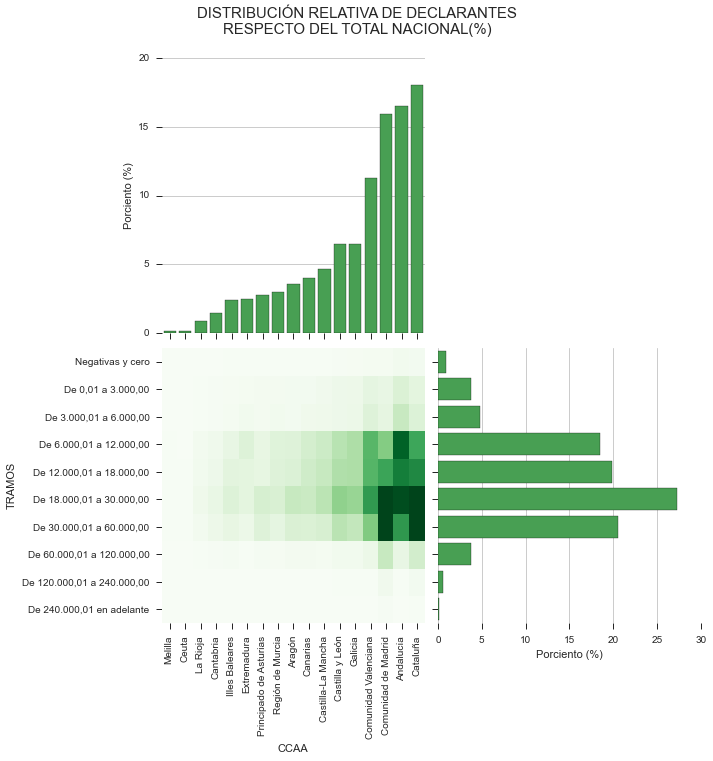

In [53]:
# GRAFICO
fs = (10,10)
plt.figure(figsize=fs)
ax1 = plt.subplot(2,2,3)
ax3 = plt.subplot(2,2,4)
ax2 = plt.subplot(2,2,1)

dist.index = [info_tramos[i] for i in dist.index]
dist.columns = [info_ccaa[str(c)] for c in dist.columns]

# densidad
sns.heatmap(dist, ax=ax1, cbar=False, cmap='Greens', robust=True)

# barras
g2 = sns.barplot(x=dist_t.index, y=dist_t.values, ax=ax2, color=sns.xkcd_rgb["medium green"])
g3 = sns.barplot(x=dist_ca, y=dist.index, ax=ax3, orient='horizontal', color=sns.xkcd_rgb["medium green"])

# estilo

sns.despine(ax=ax2, left=True, bottom=True)
sns.despine(ax=ax3, left=True, bottom=True)

ax2.yaxis.grid(True)
ax2.set_xticklabels('')
ax2.set_xlabel('')
ax2.set_ylabel('Porciento (%)')

ax3.xaxis.grid(True)
ax3.set_yticklabels('')
ax3.set_xlabel('Porciento (%)')

ax1.set_xlabel('CCAA')
ax1.set_ylabel('TRAMOS')

plt.suptitle('DISTRIBUCIÓN RELATIVA DE DECLARANTES \nRESPECTO DEL TOTAL NACIONAL(%)', fontsize=15, y=1.05)

plt.tight_layout()
# guardar grafico
plt.savefig('imgs/dist_%s' % (date), bbox_inches='tight')

In [16]:
lc = {}

In [17]:
# DISTRIBUCIÓN ACUMULADA

for v in variables_interes:
    v = list(v)                                 # Para cada par (factor, variable interes) 
    cdf = data[v].copy()                        # creamos la variable funcion de densidad acumulada cdf
    
    cdf = cdf.sort_values(by=v[1],              # ordenamos la variable monetaria de menor a mayor
                          ascending=True)
    
    cdf[v[1]] = cdf.product(axis=1)             # variable monetaria a poblacional (producto de factor * variable)
    
    cdf[v] = cdf[v].cumsum(axis=0) / cdf.sum()  # suma acumulada y dividimos por el total para normalizar
    
    lc[v[1]] = [cdf[v[0]], cdf[v[1]]]           # guardamos el resultado

In [38]:
lc.keys()

dict_keys(['c620', 'c455', 'c732', 'deduc_vh', 'ingresostrabajo', 'citotal'])

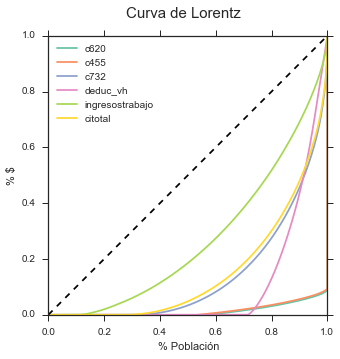

In [39]:
plt.figure(figsize=(5,5))

for k in lc.keys():    
    plt.plot(lc[k][0], lc[k][1], label=k)

plt.plot([0,1], color='black', linestyle='--')
plt.suptitle('Curva de Lorentz', fontsize=15)
plt.xlabel('% Población')
plt.ylabel('% $')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(loc=0)
plt.savefig('imgs/lorentz_%s_%s.png' % ('principales', date), bbox_iches='tight')

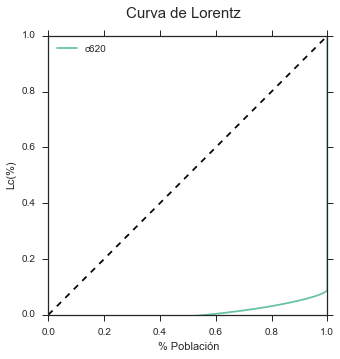

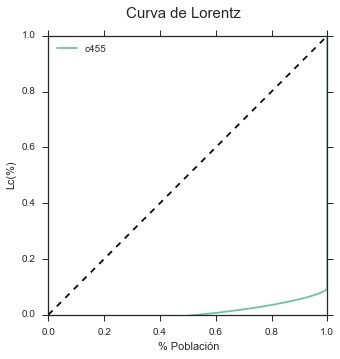

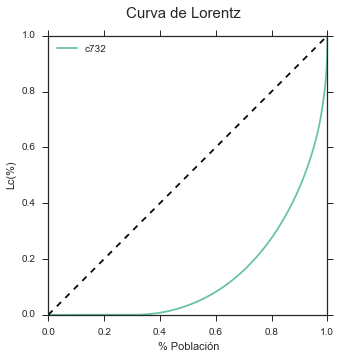

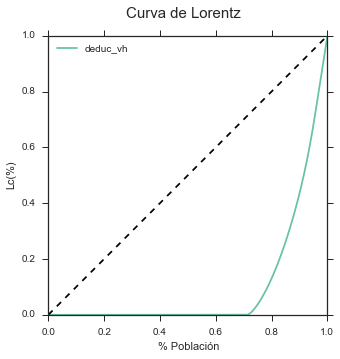

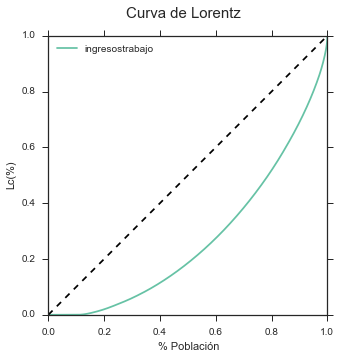

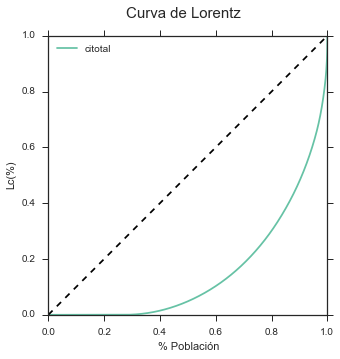

In [138]:
# crear todos los gráficos individuales

for i, k in enumerate(lc.keys()):
    plt.figure(figsize=(5,5))
    ax = plt.subplot(1,1,1)
    ax.plot(lc[k][0], lc[k][1], label=k)
    ax.plot([0,1], color='black', linestyle='--')
    plt.suptitle('Curva de Lorentz', fontsize=15)
    plt.xlabel('% Población')
    plt.ylabel('Lc(%)')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.legend(loc=0)
    plt.savefig('imgs/lc_%s_%s_%s.png' % ('principales', date, i), bbox_iches='tight')

In [40]:
lc.keys()

dict_keys(['c620', 'c455', 'c732', 'deduc_vh', 'ingresostrabajo', 'citotal'])

In [139]:
%%html
<iframe src="//giphy.com/embed/DXzihcl9gQERa" width="480" height="480" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="http://giphy.com/gifs/DXzihcl9gQERa">via GIPHY</a></p>
<iframe src="//giphy.com/embed/tsk8suJX4g5yg" width="480" height="480" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="http://giphy.com/gifs/tsk8suJX4g5yg">via GIPHY</a></p>

                     Gini
ingresostrabajo  0.461160
citotal          0.697923
c732             0.722776
deduc_vh         0.798746
c455             0.986210
c620             0.991811


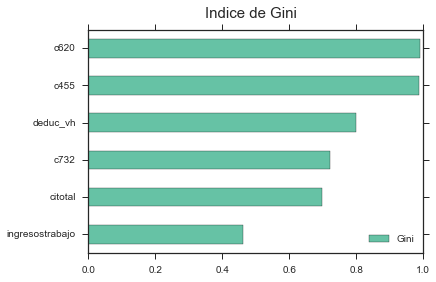

In [42]:
# indice de gini

gini = {}

for k in lc.keys():
    area_total = 0.5
    area_bajo = si.trapz(x=lc[k][0], y=lc[k][1])
    area_entre = area_total - area_bajo
    gini[k] = area_entre / area_total

df_gini = pd.DataFrame.from_dict(gini, orient='index').sort_values(by=0)
df_gini.columns = ['Gini']
df_gini.plot(kind='barh')
plt.suptitle('Indice de Gini', fontsize=15)
plt.savefig('imgs/gini_%s.png' % date, bbbox_inches='tight')

print(df_gini)

#  CURVA DE LORENTZ GENERALIZADA
##  DISTRIBUCIÓN ACUMULADA
###  glc Generalized Lorentz Curve

Nota: Al ordenar la variable monetaria, cambia el orden de los pesos, por lo que ha de calcularse para cada variable.

In [108]:
glc = {}
N_pob = data[v[0]].sum() # total

for v in variables_interes:

    # Para cada par (factor, variable interes) 
    v = list(v)

    # crea la variable: funcion de densidad acumulada
    cdf = data[v].copy()
    
    # ordenamos la variable monetaria de menor a mayor
    cdf = cdf.sort_values(by=v[1], ascending=True)

    # media ponderada
    cdf['weigthed_mean'] = cdf[v[1]] * cdf[v[0]]
    cdf['weigthed_mean'] = cdf['weigthed_mean'].cumsum() / cdf[v[0]].cumsum()

    print('%s weigthed' % v[1])

    cdf[v[0]] = cdf[v[0]].cumsum(axis=0) * 100 / N_pob  # en porcentaje

    glc[v[1]] = [cdf[v[0]].values, cdf.weigthed_mean.values / 100]  # guardamos el resultado

ingresostrabajo weigthed
c455 weigthed
c620 weigthed
citotal weigthed
c732 weigthed
deduc_vh weigthed


In [109]:
glc.keys()

dict_keys(['c620', 'c455', 'c732', 'deduc_vh', 'ingresostrabajo', 'citotal'])

In [118]:
for k, v in glc.items():
    print(k, max(v[1]), k in ['c732', 'deduc_vh', 'citotal'])

c620 154122.838691 False
c455 157593.557008 False
c732 3665.66063849 True
deduc_vh 213.410134882 True
ingresostrabajo 20525.0150499 False
citotal 3921.24828115 True


In [97]:
def form3(x, pos):
    """ This function returns a string with 3 decimal places, given the input x"""
    return '{:,}'.format(x).replace(',', ' ')

formatter = FuncFormatter(form3)

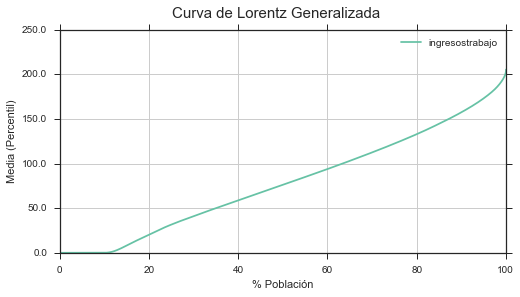

In [145]:
plt.figure(figsize=(8,4))

for k in ['ingresostrabajo']:
    plt.plot(glc[k][0], glc[k][1]/100, label=k)

plt.suptitle('Curva de Lorentz Generalizada', fontsize=15)
plt.xlabel('% Población')
plt.ylabel('Media (Percentil)')
plt.xlim(0,100)
plt.legend(loc=0)
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatter))
plt.gca().grid(True)
plt.savefig('imgs/generalized_lorentz_%s_%s.png' % ('principales', date), bbox_iches='tight')

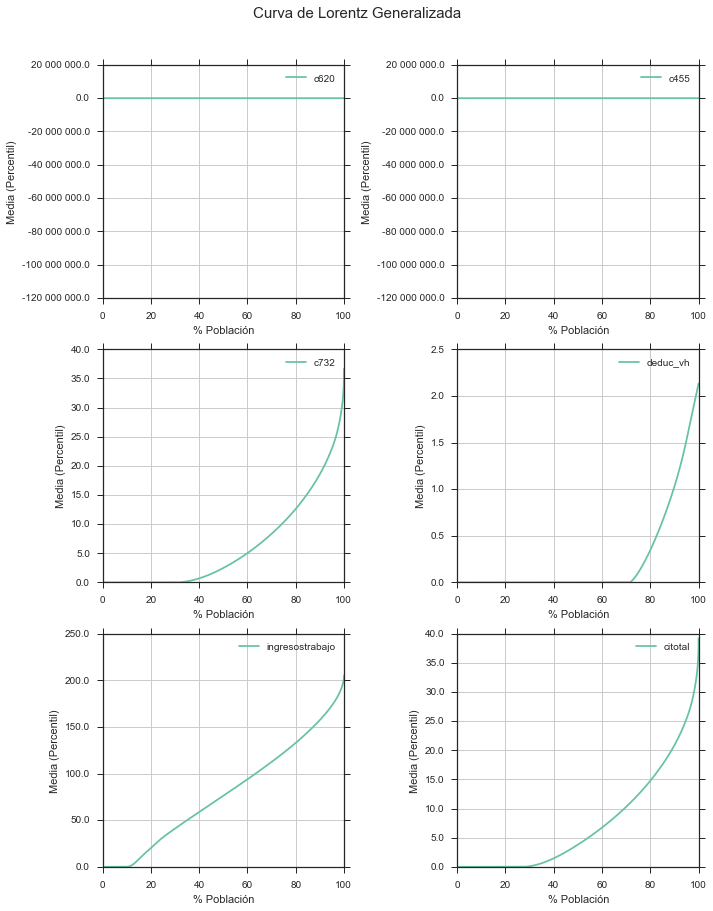

In [134]:
fig = plt.figure(figsize=(10,2*6))
axs = list()
for i, k in enumerate(glc.keys()):
    globals()['ax%s' % (i+1)] = fig.add_subplot(3, 2, i+1)
    axs.append(globals()['ax%s' % (i+1)])
    axs[-1].plot(glc[k][0], glc[k][1] / 100, label = k)

plt.suptitle('Curva de Lorentz Generalizada', fontsize=15, y=1.05)

for a in axs:
    a.set_xlabel('% Población')
    a.set_ylabel('Media (Percentil)')
    a.legend(loc=0)
    a.set_xlim(0,100)
    a.yaxis.set_major_formatter(FuncFormatter(formatter))
    a.grid(True)

plt.tight_layout()
plt.savefig('imgs/glc_%s_%s.png' % ('principales', date), bbox_iches='tight')

In [135]:
lc_df = pd.DataFrame.from_dict(lc)
glc_df = pd.DataFrame.from_dict(glc)

# MEDIA DE LOS INGRESOS DEL TRABAJO

In [78]:
variable = 'c680'

data['%s_w' % variable] = data[variable] * data['factoroptimizado']

total = data['factoroptimizado'].sum()

# titulo
ttl = 'Media de %s' % variable

# tabla de valores
valores = data.pivot_table(index='tramo', 
                           columns='ccaa', 
                           values='%s_w' % variable, 
                           aggfunc='sum')

# pasamos los valores de centimos a euros
valores = valores / 100 

# tabla de pesos
w = data.pivot_table(index='tramo', 
                     columns='ccaa', 
                     values='factoroptimizado', 
                     aggfunc='sum')

# si multiplicamos los valores por sus pesos y dividimos por la suma de los pesos
# tenemos las medias ponderadas para cada ccaa y tramo

media_nacional = valores.sum(1).sum() / w.sum(1).sum()
r = valores * w / w

# ordenar los tramos
tramo_names = r.sortlevel(ascending=True).index
tramos = r.sum(1) / w.sum(1)                        # COMPROBAR

# ordenar las ccaa por frecuencia
ccaas = r.sum(0) / w.sum(0)                         # COMPROBAR
ccaas = ccaas.sort_values(ascending=True)
ccaa_names = ccaas.index

# aplicamos el orden en la tabla
r = r[ccaa_names]
r = r.T[tramo_names]
r = r.T

# cambiar los codigos por los nombres de los tramos y ccaa
r.index = [info_tramos[i] for i in r.index]
r.columns = [info_ccaa[str(c)] for c in r.columns]

In [ ]:
sns.heatmap()

/Users/mmngreco/Virtualenvs/ipynb/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


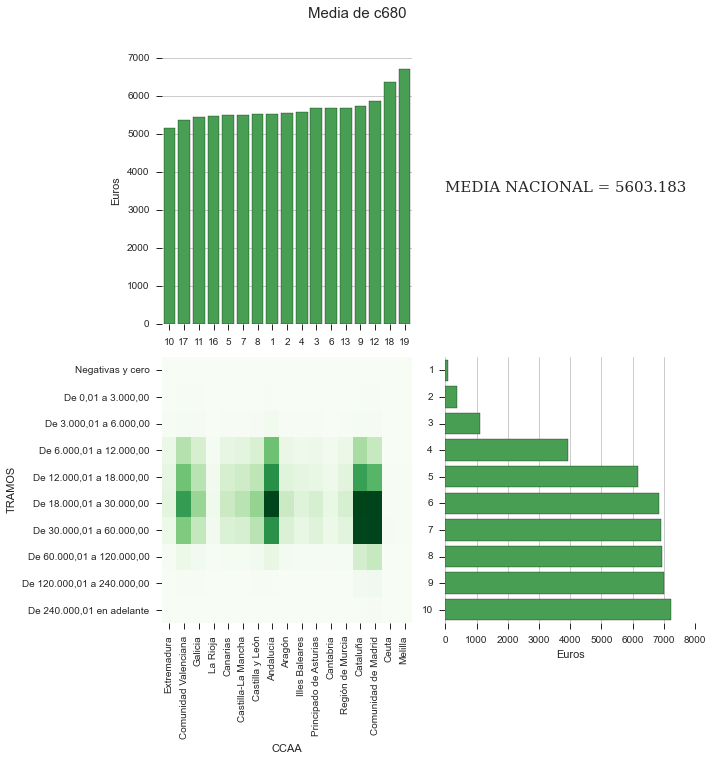

In [103]:
# GRÁFICOS
fs = (10,10)
# subplots
plt.figure(figsize=fs)
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)

ax2.text(0, 0.5,'MEDIA NACIONAL = %.3f' % media_nacional, fontsize=15, family='Serif')
# barras
g1 = sns.barplot(x=ccaas.index, 
                 y=ccaas.values, 
                 ax=ax1, 
                 color=sns.xkcd_rgb["medium green"])#.set_xticklabels('')

g4 = sns.barplot(x=tramos.values, 
                 y=tramos.index, 
                 ax=ax4, 
                 orient='horizontal', 
                 color=sns.xkcd_rgb["medium green"])#.set_yticklabels('')

# densidad
sns.heatmap(data=r, ax=ax3, cbar=False, cmap='Greens', robust=True, annot=False, square=False, fmt='.2f')

# estilo
plt.suptitle(ttl, fontsize=15, y=1.05)

sns.despine(ax=ax1, left=True, bottom=True)
sns.despine(ax=ax4, left=True, bottom=True)
sns.despine(ax=ax2, left=True, bottom=True)

ax1.set_xlabel('')
ax4.set_ylabel('')

ax1.set_ylabel('Euros')
ax4.set_xlabel('Euros')

ax1.yaxis.grid(True)
ax4.xaxis.grid(True)

ax3.set_ylabel('TRAMOS')
ax3.set_xlabel('CCAA')

ax2.tick_params(axis='both', 
                which='both', 
                bottom='off', 
                top='off', 
                labelbottom='off', 
                right='off', 
                left='off', 
                labelleft='off')

# descripción

plt.tight_layout()
plt.savefig('imgs/dist_%s_%s' % (variable, date), bbox_inches='tight')

In [97]:
info_ccaa

{'1': 'Andalucía',
 '10': 'Extremadura',
 '11': 'Galicia',
 '12': 'Comunidad de Madrid',
 '13': 'Región de Murcia',
 '16': 'La Rioja',
 '17': 'Comunidad Valenciana',
 '18': 'Ceuta',
 '19': 'Melilla',
 '2': 'Aragón',
 '3': 'Principado de Asturias',
 '4': 'Illes Baleares',
 '5': 'Canarias',
 '6': 'Cantabria',
 '7': 'Castilla-La Mancha',
 '8': 'Castilla y León',
 '9': 'Cataluña'}

In [59]:
info_tramos

{1: 'Negativas y cero',
 2: 'De 0,01 a 3.000,00',
 3: 'De 3.000,01 a 6.000,00',
 4: 'De 6.000,01 a 12.000,00',
 5: 'De 12.000,01 a 18.000,00',
 6: 'De 18.000,01 a 30.000,00',
 7: 'De 30.000,01 a 60.000,00',
 8: 'De 60.000,01 a 120.000,00',
 9: 'De 120.000,01 a 240.000,00',
 10: 'De 240.000,01 en adelante'}

# MCO



In [114]:

n_ca = 1
d = df[df['ccaa'] == n_ca]
stats_680 = sm.stats.DescrStatsW(d.c721, weights=d.factoroptimizado)

In [116]:
stats_680.mean/100

1390.639

In [112]:
np.average(df.c680, weights=df.factoroptimizado)/100

5603.183

In [109]:
sum(df.c680 * df.factoroptimizado) / df.factoroptimizado.sum() / 100

5603.183

In [122]:
f = 'c721 ~ C(ccaa) - 1'
m = wls(f, weights = df.factoroptimizado, data = df).fit()
print(m.summary())

                            WLS Regression Results                            
Dep. Variable:                   c721   R-squared:                       0.004
Model:                            WLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     141.3
Date:                mar, 17 nov 2015   Prob (F-statistic):               0.00
Time:                        22:28:58   Log-Likelihood:            -9.1284e+06
No. Observations:              597941   AIC:                         1.826e+07
Df Residuals:                  597924   BIC:                         1.826e+07
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
C(ccaa)[1]   1.391e+05   2798.333     49.695      

In [123]:
sm.stats.diagnostic.het_white(m.resid, m.model.exog)

(18.517, 0.295, 1.157, 0.295)

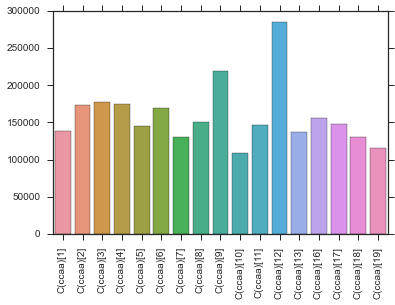

In [126]:
g = sns.barplot(m.model.exog_names, m.params)
ax = plt.gca()
gg = plt.setp(ax.get_xticklabels(), rotation=90)

In [26]:
info_ccaa

{'1': 'Andalucía',
 '10': 'Extremadura',
 '11': 'Galicia',
 '12': 'Comunidad de Madrid',
 '13': 'Región de Murcia',
 '16': 'La Rioja',
 '17': 'Comunidad Valenciana',
 '18': 'Ceuta',
 '19': 'Melilla',
 '2': 'Aragón',
 '3': 'Principado de Asturias',
 '4': 'Illes Baleares',
 '5': 'Canarias',
 '6': 'Cantabria',
 '7': 'Castilla-La Mancha',
 '8': 'Castilla y León',
 '9': 'Cataluña'}